### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA

### Loading data

In [2]:
df_attacking = pd.read_csv("Stefano_test/data/attacking_data.csv")
df_attempts = pd.read_csv("Stefano_test/data/attempts_data.csv")
df_defending = pd.read_csv("Stefano_test/data/defending_data.csv")
df_disciplinary = pd.read_csv("Stefano_test/data/disciplinary_data.csv")
df_distribution = pd.read_csv("Stefano_test/data/distribution_data.csv")
df_goalkeeping = pd.read_csv("Stefano_test/data/goalkeeping_data.csv")
df_goals = pd.read_csv("Stefano_test/data/goals_data.csv")
df_key_stats = pd.read_csv("Stefano_test/data/key_stats_data.csv")
df_players = pd.read_csv("Stefano_test/data/players_data.csv")
df_teams = pd.read_csv("Stefano_test/data/teams_data.csv")

### Exploring the data

In [3]:
df_attacking.head()

,id_player,assists,corners_taken,offsides,dribbles
0,250052469,4.0,0.0,1.0,9.0
1,250130414,3.0,21.0,0.0,2.0
2,250070417,3.0,19.0,0.0,0.0
3,250112880,3.0,12.0,2.0,7.0
4,250177886,3.0,8.0,0.0,5.0


In [4]:
df_attempts.head()

,id_player,total_attempts,attempts_on_target,attempts_off_target,blocked
0,250016833,20.0,12.0,6.0,2.0
1,250103758,21.0,10.0,5.0,6.0
2,250121533,17.0,10.0,6.0,1.0
3,250076574,20.0,9.0,5.0,6.0
4,250105927,15.0,8.0,3.0,4.0


In [5]:
df_goals.head()

,id_player,goals,inside_area,outside_area,right_foot,left_foot,head,other,penalties_scored
0,250112880,5.0,3.0,2.0,1.0,4.0,0.0,0.0,0.0
1,250139445,3.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0
2,250121533,4.0,3.0,1.0,2.0,2.0,0.0,0.0,1.0
3,250159544,3.0,2.0,1.0,3.0,0.0,0.0,0.0,0.0
4,250091187,3.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0


In [6]:
df_key_stats.head()

,id_player,distance_covered(km/h),top_speed,minutes_played,matches_appareance
0,250016833,43.71,30.35,360.0,4.0
1,250105927,41.94,34.55,360.0,4.0
2,250121533,38.39,35.47,360.0,4.0
3,250121294,46.61,32.26,360.0,4.0
4,250160436,44.67,33.39,360.0,4.0


In [7]:
df_distribution.head()

,id_player,passing_accuracy(%),passes_attempted,passes_completed,crossing_accuracy(%),crosses_attempted,crosses_completed,free_kick_taken,matches_appearance
0,250050416,100.0,19.0,19.0,0.0,0.0,0.0,0.0,1.0
1,250138626,100.0,17.0,17.0,0.0,0.0,0.0,0.0,1.0
2,1902445,100.0,14.0,14.0,0.0,0.0,0.0,0.0,1.0
3,250089626,100.0,13.0,13.0,0.0,0.0,0.0,0.0,2.0
4,250169763,100.0,10.0,10.0,0.0,0.0,0.0,0.0,2.0


In [8]:
df_players.head()

,id_player,player_name,nationality,field_position,position,weight(kg),height(cm),age,id_team,player_image
0,250016833,Harry Kane,England,Forward,STRIKER,65.0,188.0,31,50037,https://img.uefa.com/imgml/TP/players/1/2025/3...
1,250105927,Viktor Gyökeres,Sweden,Forward,NaN,NaN,NaN,26,50149,https://img.uefa.com/imgml/TP/players/1/2025/3...
2,250121533,Vinícius Júnior,Brazil,Forward,UNKNOWN,NaN,NaN,24,50051,https://img.uefa.com/imgml/TP/players/1/2025/3...
3,250121294,Tijjani Reijnders,Netherlands,Midfielder,CENTRAL_MIDFIELDER,NaN,NaN,26,50058,https://img.uefa.com/imgml/TP/players/1/2025/3...
4,250160436,Maghnes Akliouche,France,Midfielder,UNKNOWN,NaN,NaN,22,50023,https://img.uefa.com/imgml/TP/players/1/2025/3...


### Feature selection

In [9]:
# Feature selection
goals = df_goals[['id_player','goals']].copy()
top_speed = df_key_stats[['id_player','top_speed']].copy()
assists_dribbles = df_attacking[['id_player','assists','dribbles']].copy()
attempts = df_attempts[['id_player','attempts_on_target', 'total_attempts']].copy()
minutes = df_key_stats[['id_player','minutes_played']].copy()

# Merging all dataframes with offensive features
df = pd.merge(goals, top_speed, on='id_player', how='inner')
df = pd.merge(df, assists_dribbles, on='id_player', how='inner')
df = pd.merge(df, attempts, on='id_player', how='inner')
df = pd.merge(df, minutes, on='id_player', how='inner')

# Feature engineering
df['finishing_ability'] = df['goals'] / df['attempts_on_target'] # need to include expected goals data which measure the probability of a shot to become a goal (goals - XG is the finishing ability)
# play_making = assists - expected assists
df['goals_contribution'] = df['goals'] + df['assists']
df['goals_per_shot'] = df['goals'] / df['total_attempts']
df['shots_per_90'] = df['total_attempts'] / df['minutes_played'] * 90

df

,id_player,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90
0,250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.00,8.0,0.333333,4.299363
1,250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.50,3.0,0.300000,2.639296
2,250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.40,4.0,0.235294,4.250000
3,250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.00,3.0,0.500000,2.186235
4,250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.75,3.0,0.600000,2.295918
...,...,...,...,...,...,...,...,...,...,...,...,...
903,250011071,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,250000104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,108501,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,103827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data

In [10]:
print(df['goals_per_shot'].isin([np.inf, -np.inf]).any())  # Checks for both +inf and -inf
print(df[df['goals_per_shot'] == np.inf]) # Display the rows with inf

False
Empty DataFrame
Columns: [id_player, goals, top_speed, assists, dribbles, attempts_on_target, total_attempts, minutes_played, finishing_ability, goals_contribution, goals_per_shot, shots_per_90]
Index: []


In [11]:
# stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id_player,908.0,2.414979e+08,4.522600e+07,69178.00,2.500805e+08,2.501215e+08,2.501668e+08,2.502042e+08
goals,727.0,2.833563e-01,7.154615e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
top_speed,727.0,3.121792e+01,2.788519e+00,19.51,3.022500e+01,3.181000e+01,3.302000e+01,3.655000e+01
assists,727.0,2.173315e-01,5.500584e-01,0.00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
dribbles,727.0,2.795048e+00,4.318016e+00,0.00,0.000000e+00,1.000000e+00,3.500000e+00,3.400000e+01
attempts_on_target,727.0,9.284732e-01,1.571212e+00,0.00,0.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01
total_attempts,727.0,2.569464e+00,3.272357e+00,0.00,0.000000e+00,1.000000e+00,4.000000e+00,2.100000e+01
minutes_played,727.0,1.904292e+02,1.179471e+02,1.00,9.000000e+01,1.860000e+02,2.960000e+02,3.600000e+02
finishing_ability,306.0,2.919325e-01,3.790272e-01,0.00,0.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00
goals_contribution,727.0,5.006878e-01,9.775367e-01,0.00,0.000000e+00,0.000000e+00,1.000000e+00,8.000000e+00


In [12]:
# Check for missing values
df.isnull().sum()

id_player               0
goals                 181
top_speed             181
assists               181
dribbles              181
attempts_on_target    181
total_attempts        181
minutes_played        181
finishing_ability     602
goals_contribution    181
goals_per_shot        417
shots_per_90          181
dtype: int64

In [13]:
df.dtypes

id_player               int64
goals                 float64
top_speed             float64
assists               float64
dribbles              float64
attempts_on_target    float64
total_attempts        float64
minutes_played        float64
finishing_ability     float64
goals_contribution    float64
goals_per_shot        float64
shots_per_90          float64
dtype: object

In [14]:
# Creating offense data frame and dropping players with NA minutes played
offense_df = df.dropna(subset=['minutes_played'])
offense_df

,id_player,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90
0,250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.00,8.0,0.333333,4.299363
1,250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.50,3.0,0.300000,2.639296
2,250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.40,4.0,0.235294,4.250000
3,250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.00,3.0,0.500000,2.186235
4,250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.75,3.0,0.600000,2.295918
...,...,...,...,...,...,...,...,...,...,...,...,...
722,250007631,0.0,24.12,0.0,0.0,0.0,0.0,90.0,NaN,0.0,NaN,0.000000
723,250004986,0.0,26.69,0.0,0.0,0.0,0.0,12.0,NaN,0.0,NaN,0.000000
724,1905643,0.0,31.62,0.0,4.0,1.0,1.0,85.0,0.00,0.0,0.000000,1.058824
725,1902445,0.0,22.43,0.0,0.0,0.0,0.0,45.0,NaN,0.0,NaN,0.000000


In [15]:
offense_df.isnull().sum()

id_player               0
goals                   0
top_speed               0
assists                 0
dribbles                0
attempts_on_target      0
total_attempts          0
minutes_played          0
finishing_ability     421
goals_contribution      0
goals_per_shot        236
shots_per_90            0
dtype: int64

In [16]:
offense_df['goals_per_shot']

0      0.333333
1      0.300000
2      0.235294
3      0.500000
4      0.600000
         ...   
722         NaN
723         NaN
724    0.000000
725         NaN
726         NaN
Name: goals_per_shot, Length: 727, dtype: float64

In [17]:
offense_df['finishing_ability']

0      1.00
1      0.50
2      0.40
3      1.00
4      0.75
       ... 
722     NaN
723     NaN
724    0.00
725     NaN
726     NaN
Name: finishing_ability, Length: 727, dtype: float64

In [18]:
# Impute NaN values
imputer = SimpleImputer(strategy='most_frequent')
offense_df['goals_per_shot'] = imputer.fit_transform(offense_df[['goals_per_shot']])
offense_df['finishing_ability'] = imputer.fit_transform(offense_df[['finishing_ability']])

offense_df.isnull().sum()

/tmp/ipykernel_355095/38496937.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_df['goals_per_shot'] = imputer.fit_transform(offense_df[['goals_per_shot']])
/tmp/ipykernel_355095/38496937.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_df['finishing_ability'] = imputer.fit_transform(offense_df[['finishing_ability']])


id_player             0
goals                 0
top_speed             0
assists               0
dribbles              0
attempts_on_target    0
total_attempts        0
minutes_played        0
finishing_ability     0
goals_contribution    0
goals_per_shot        0
shots_per_90          0
dtype: int64

In [19]:
# Features to be scaled
features = ['goals', 'top_speed' ,'assists', 'dribbles', 'attempts_on_target',
            'finishing_ability', 'goals_contribution' ,'goals_per_shot',
            'shots_per_90']

# Scale the features
scaler = StandardScaler()


df_scaled = offense_df.set_index('id_player')
df_scaled = scaler.fit_transform(offense_df[features])
df_scaled = pd.DataFrame(df_scaled, columns=features)


df_scaled

,goals,top_speed,assists,dribbles,attempts_on_target,finishing_ability,goals_contribution,goals_per_shot,shots_per_90
0,6.596988,0.772295,5.062343,0.974486,2.593113,3.081066,7.676924,1.509148,1.274143
1,3.799665,0.316542,-0.395378,2.828464,3.230003,1.324719,2.558505,1.319950,0.554323
2,5.198327,1.525901,-0.395378,7.231662,5.777562,0.973450,3.582189,0.952683,1.252739
3,3.799665,0.653871,-0.395378,0.974486,1.319334,3.081066,2.558505,2.455137,0.357871
4,3.799665,0.251947,-0.395378,-0.184250,1.956224,2.202893,2.558505,3.022730,0.405431
...,...,...,...,...,...,...,...,...,...
722,-0.396320,-2.547162,-0.395378,-0.647745,-0.591335,-0.431628,-0.512546,-0.382831,-0.590100
723,-0.396320,-1.624891,-0.395378,-0.647745,-0.591335,-0.431628,-0.512546,-0.382831,-0.590100
724,-0.396320,0.144289,-0.395378,0.279244,0.045555,-0.431628,-0.512546,-0.382831,-0.130984
725,-0.396320,-3.153635,-0.395378,-0.647745,-0.591335,-0.431628,-0.512546,-0.382831,-0.590100


### Clustering

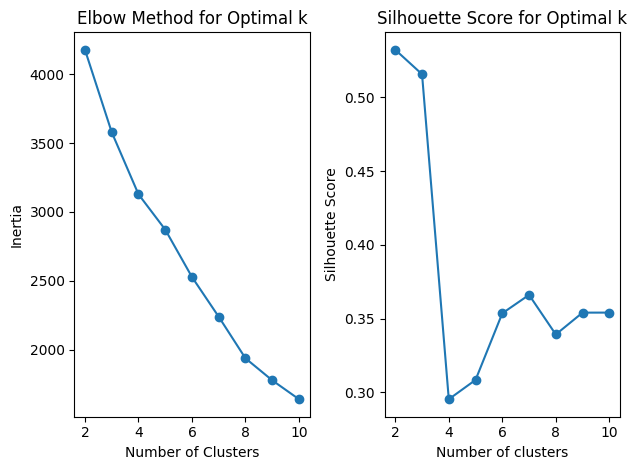

In [20]:
# K-Means clustering
# optimal number of clusters using the elbow method and silhouette score
inertia = []
silhouette_scores_km = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores_km.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot the elbow graph
# plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')


# Plot Silhouette score
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores_km, marker='o')
plt.title('Silhouette Score for Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()


Best number of clusters (Grid Search): 2
Best Silhouette Score: 0.5321195181696246


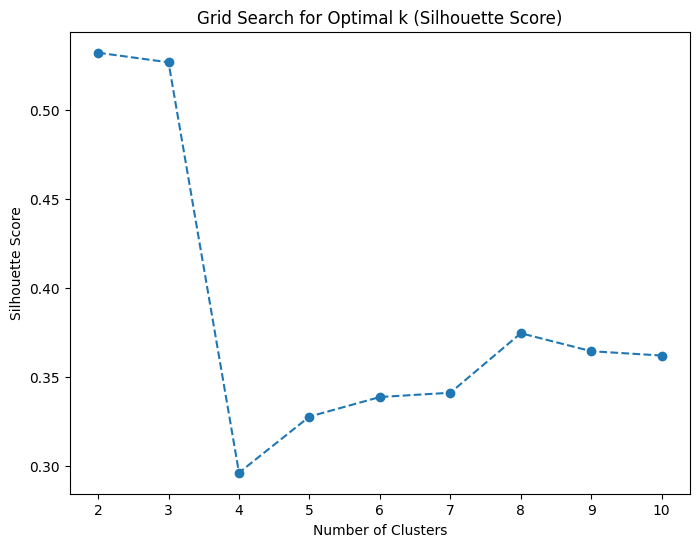

In [21]:
# Grid search for optimal K-means number of clusters
# Define the range of k values to search
k_range = range(2, 11)  # Test k from 2 to 10

# Perform Grid Search
best_score = -1  # Initialize with a very bad score
best_k = None
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)

    if silhouette_avg > best_score:
        best_score = silhouette_avg
        best_k = k

print(f"Best number of clusters (Grid Search): {best_k}")
print(f"Best Silhouette Score: {best_score}")

# Plot the Silhouette Scores to visualize the search
silhouette_scores = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='--')
plt.title('Grid Search for Optimal k (Silhouette Score)')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [22]:
# Optimal number of clusters
optimal_k = 3

# Apply KMeans
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
offense_df['km_cluster'] = kmeans.fit_predict(df_scaled)

offense_df.head()

/tmp/ipykernel_355095/1258185417.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_df['km_cluster'] = kmeans.fit_predict(df_scaled)


,id_player,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster
0,250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.00,8.0,0.333333,4.299363,1
1,250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.50,3.0,0.300000,2.639296,1
2,250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.40,4.0,0.235294,4.250000,1
3,250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.00,3.0,0.500000,2.186235,2
4,250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.75,3.0,0.600000,2.295918,2


In [23]:
# DBSCAN clustering
# Tuning DBSCAN parameters with a range of values
eps_range = np.arange(0.5, 2.0, 0.1)
min_samples_range = range(5, 21)

best_silhouette_dbscan = -1  # Initialize with a low score
best_eps = None
best_min_samples = None

for eps in eps_range:
    for min_samples in min_samples_range:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df_scaled)

        # Only calculate Silhouette if there are at least 2 clusters
        if len(set(labels)) > 1:
            silhouette_avg = silhouette_score(df_scaled, labels)
            if silhouette_avg > best_silhouette_dbscan:
                best_silhouette_dbscan = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best Silhouette Score (DBSCAN): {best_silhouette_dbscan:.4f} with eps={best_eps} and min_samples={best_min_samples}")


Best Silhouette Score (DBSCAN): 0.3819 with eps=0.7999999999999999 and min_samples=18


In [24]:
# Apply DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
offense_df['DBS_Cluster'] = dbscan.fit_predict(df_scaled)

offense_df

/tmp/ipykernel_355095/132555021.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  offense_df['DBS_Cluster'] = dbscan.fit_predict(df_scaled)


,id_player,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster,DBS_Cluster
0,250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.00,8.0,0.333333,4.299363,1,-1
1,250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.50,3.0,0.300000,2.639296,1,-1
2,250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.40,4.0,0.235294,4.250000,1,-1
3,250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.00,3.0,0.500000,2.186235,2,-1
4,250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.75,3.0,0.600000,2.295918,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,250007631,0.0,24.12,0.0,0.0,0.0,0.0,90.0,0.00,0.0,0.000000,0.000000,0,0
723,250004986,0.0,26.69,0.0,0.0,0.0,0.0,12.0,0.00,0.0,0.000000,0.000000,0,0
724,1905643,0.0,31.62,0.0,4.0,1.0,1.0,85.0,0.00,0.0,0.000000,1.058824,0,0
725,1902445,0.0,22.43,0.0,0.0,0.0,0.0,45.0,0.00,0.0,0.000000,0.000000,0,0


In [25]:
# Comparison

# Silhouette Score for K-Means
kmeans_silhouette = silhouette_score(df_scaled, offense_df['km_cluster'])
print(f"Silhouette Score (K-Means): {kmeans_silhouette:.4f}")

# Silhouette Score for DBSCAN
# handle the case where DBSCAN only finds noise (-1 labels)
if len(set(offense_df['DBS_Cluster'])) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, offense_df['DBS_Cluster'])
    print(f"Silhouette Score (DBSCAN): {dbscan_silhouette:.4f}")
else:
    print("DBSCAN only found noise. Silhouette score not applicable.")

# Davies-Bouldin Index (Lower is better)
kmeans_dbi = davies_bouldin_score(df_scaled, offense_df['km_cluster'])
dbscan_dbi = davies_bouldin_score(df_scaled, offense_df['DBS_Cluster'])

print(f"Davies-Bouldin Index (K-Means): {kmeans_dbi:.4f}")
print(f"Davies-Bouldin Index (DBSCAN): {dbscan_dbi:.4f}")

Silhouette Score (K-Means): 0.5267
Silhouette Score (DBSCAN): 0.3819
Davies-Bouldin Index (K-Means): 1.3988
Davies-Bouldin Index (DBSCAN): 1.4694


In [26]:
# Analyze K-Means clusters
df_km_clustered = offense_df.groupby('km_cluster').mean()

# Display the average characteristics of each cluster
df_km_clustered.drop('id_player', axis=1)

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,DBS_Cluster
km_cluster,,,,,,,,,,,,
0,0.000000,30.847835,0.096831,1.911972,0.392606,1.580986,173.713028,0.000000,0.096831,0.000000,1.024269,-0.197183
1,1.068966,32.887241,1.448276,10.206897,3.982759,9.000000,284.293103,0.242720,2.517241,0.110963,3.572529,-1.000000
2,1.425743,32.340594,0.188119,3.504950,2.188119,4.435644,230.534653,0.745085,1.613861,0.421772,1.984006,-1.000000


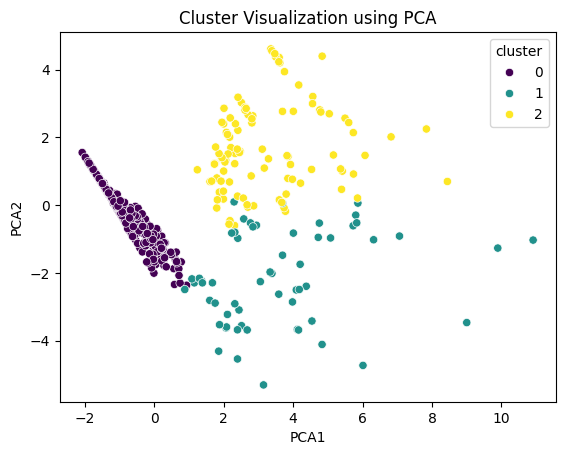

In [27]:
# Visuialize K-Means clusters
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)

# Create a DataFrame with PCA results
df_pca = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
df_pca['cluster'] = offense_df['km_cluster']

# Plot the clusters
sns.scatterplot(x='PCA1', y='PCA2', hue='cluster', data=df_pca, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.show()

In [28]:
# Analyze DBS clusters
df_dbs_clustered = offense_df.groupby('DBS_Cluster').mean()

# Display the average characteristics of each cluster
df_dbs_clustered.drop('id_player', axis=1)

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster
DBS_Cluster,,,,,,,,,,,,
-1,0.760148,32.255424,0.583026,5.394834,2.040590,4.985240,227.166052,0.329636,1.343173,0.18094,2.611115,0.95941
0,0.000000,30.601338,0.000000,1.250000,0.267544,1.133772,168.596491,0.000000,0.000000,0.00000,0.617903,0.00000


In [29]:
# Merge 'player_name' column
offense_df = offense_df.merge(df_players[['id_player', 'player_name']], on='id_player', how='inner')
offense_df.set_index('id_player', inplace=True)
offense_df

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster,DBS_Cluster,player_name
id_player,,,,,,,,,,,,,,
250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.00,8.0,0.333333,4.299363,1,-1,Raphinha
250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.50,3.0,0.300000,2.639296,1,-1,Florian Wirtz
250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.40,4.0,0.235294,4.250000,1,-1,Vinícius Júnior
250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.00,3.0,0.500000,2.186235,2,-1,Antoni Milambo
250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.75,3.0,0.600000,2.295918,2,-1,Sandro Kulenović
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250007631,0.0,24.12,0.0,0.0,0.0,0.0,90.0,0.00,0.0,0.000000,0.000000,0,0,Marc-André ter Stegen
250004986,0.0,26.69,0.0,0.0,0.0,0.0,12.0,0.00,0.0,0.000000,0.000000,0,0,Lukáš Pauschek
1905643,0.0,31.62,0.0,4.0,1.0,1.0,85.0,0.00,0.0,0.000000,1.058824,0,0,Juraj Kucka


In [30]:
offense_df[offense_df["km_cluster"]==0]

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster,DBS_Cluster,player_name
id_player,,,,,,,,,,,,,,
98078,0.0,23.62,0.0,0.0,0.0,0.0,360.0,0.0,0.0,0.0,0.000000,0,0,Simon Mignolet
98023,0.0,31.41,0.0,2.0,1.0,6.0,177.0,0.0,0.0,0.0,3.050847,0,0,Henrikh Mkhitaryan
97923,0.0,24.91,0.0,0.0,0.0,0.0,315.0,0.0,0.0,0.0,0.000000,0,0,Manuel Neuer
97746,0.0,21.24,0.0,1.0,0.0,0.0,360.0,0.0,0.0,0.0,0.000000,0,0,Yann Sommer
74954,0.0,22.89,0.0,0.0,0.0,0.0,360.0,0.0,0.0,0.0,0.000000,0,0,Kasper Schmeichel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250007631,0.0,24.12,0.0,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.000000,0,0,Marc-André ter Stegen
250004986,0.0,26.69,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.000000,0,0,Lukáš Pauschek
1905643,0.0,31.62,0.0,4.0,1.0,1.0,85.0,0.0,0.0,0.0,1.058824,0,0,Juraj Kucka


In [31]:
offense_df[offense_df["km_cluster"]==1]

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster,DBS_Cluster,player_name
id_player,,,,,,,,,,,,,,
250112880,5.0,33.37,3.0,7.0,5.0,15.0,314.0,1.000000,8.0,0.333333,4.299363,1,-1,Raphinha
250139445,3.0,32.10,0.0,15.0,6.0,10.0,341.0,0.500000,3.0,0.300000,2.639296,1,-1,Florian Wirtz
250121533,4.0,35.47,0.0,34.0,10.0,17.0,360.0,0.400000,4.0,0.235294,4.250000,1,-1,Vinícius Júnior
250099180,3.0,32.25,1.0,1.0,6.0,13.0,316.0,0.500000,4.0,0.230769,3.702532,1,-1,Dušan Vlahović
250096698,2.0,33.53,1.0,6.0,5.0,7.0,329.0,0.400000,3.0,0.285714,1.914894,1,-1,Christian Pulišić
250160436,2.0,33.39,1.0,10.0,4.0,10.0,360.0,0.500000,3.0,0.200000,2.500000,1,-1,Maghnes Akliouche
250106148,2.0,35.94,1.0,16.0,3.0,4.0,289.0,0.666667,3.0,0.500000,1.245675,1,-1,Nicolas Kühn
250196588,1.0,29.48,1.0,1.0,3.0,6.0,272.0,0.333333,2.0,0.166667,1.985294,1,-1,Hugo Magnetti
250119181,1.0,31.60,1.0,10.0,2.0,5.0,349.0,0.500000,2.0,0.200000,1.289398,1,-1,Georgiy Sudakov


In [32]:
offense_df[offense_df["km_cluster"]==2]

,goals,top_speed,assists,dribbles,attempts_on_target,total_attempts,minutes_played,finishing_ability,goals_contribution,goals_per_shot,shots_per_90,km_cluster,DBS_Cluster,player_name
id_player,,,,,,,,,,,,,,
250159544,3.0,33.04,0.0,7.0,3.0,6.0,247.0,1.000000,3.0,0.500000,2.186235,2,-1,Antoni Milambo
250091187,3.0,31.92,0.0,2.0,4.0,5.0,196.0,0.750000,3.0,0.600000,2.295918,2,-1,Sandro Kulenović
250127347,3.0,35.14,0.0,5.0,5.0,7.0,135.0,0.600000,3.0,0.428571,4.666667,2,-1,Karim Adeyemi
250022829,2.0,31.44,0.0,0.0,2.0,5.0,223.0,1.000000,2.0,0.400000,2.017937,2,-1,Hakan Çalhanoğlu
250113211,2.0,32.52,0.0,6.0,3.0,5.0,325.0,0.666667,2.0,0.400000,1.384615,2,-1,Orkun Kökçü
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250041771,1.0,29.99,0.0,0.0,1.0,1.0,43.0,1.000000,1.0,1.000000,2.093023,2,-1,Leon Goretzka
250181712,1.0,30.48,0.0,2.0,2.0,2.0,180.0,0.500000,1.0,0.500000,1.000000,2,-1,Mohammed Salisu
250123978,1.0,32.81,0.0,0.0,1.0,2.0,97.0,1.000000,1.0,0.500000,1.855670,2,-1,Malick Thiaw


In [35]:
best_cluster = offense_df[offense_df['km_cluster']==2]
best_cluster['overall_score'] = best_cluster['goals'] + best_cluster['goals_contribution'] + best_cluster['dribbles'] + best_cluster['attempts_on_target'] + best_cluster['finishing_ability'] + best_cluster['goals_per_shot'] + best_cluster['shots_per_90']
top_10_attackers = best_cluster.nlargest(10, 'overall_score')
top_10_attackers.set_index('player_name', inplace=True)

print("\nTop 10 Attackers:")
print(top_10_attackers[['goals', 'attempts_on_target', 'dribbles', 'finishing_ability', 'goals_per_shot', 'shots_per_90','overall_score']])


Top 10 Attackers:
                    goals  attempts_on_target  dribbles  finishing_ability  \
player_name                                                                  
Jamie Gittens         3.0                 4.0      15.0           0.750000   
Viktor Gyökeres       5.0                 8.0       6.0           0.625000   
Luis Díaz             3.0                 4.0      11.0           0.750000   
Michael Olise         2.0                 4.0      10.0           0.500000   
Robert Lewandowski    5.0                 6.0       2.0           0.833333   
Karim Adeyemi         3.0                 5.0       5.0           0.600000   
Martin Baturina       1.0                 1.0      15.0           1.000000   
Kerem Aktürkoğlu      3.0                 5.0       7.0           0.600000   
Petar Sučić           2.0                 3.0      11.0           0.666667   
Tijjani Reijnders     3.0                 5.0       7.0           0.600000   

                    goals_per_shot  shots_pe

/tmp/ipykernel_355095/853585821.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  best_cluster['overall_score'] = best_cluster['goals'] + best_cluster['goals_contribution'] + best_cluster['dribbles'] + best_cluster['attempts_on_target'] + best_cluster['finishing_ability'] + best_cluster['goals_per_shot'] + best_cluster['shots_per_90']
